# pytorch workflow

In [1]:
import torch
from torch import nn
from matplotlib import pyplot as plt

In [2]:
# data-> numerical encoding-> learns representation (pattern features weights) -> output

## linear regression

In [3]:
# create known parameters
weight=0.7
bias=0.3

# create dataset
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X +bias

# X,y

In [4]:
X,y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [5]:
tensor = torch.tensor([1, 2, 3, 4, 5])
tensor2= torch.arange(1,6,1).unsqueeze(dim=1)

In [6]:
print(tensor.shape,tensor2.shape)
print(tensor.size(),tensor2.size())
print(tensor)
print(tensor2)
print(tensor2*10)

torch.Size([5]) torch.Size([5, 1])
torch.Size([5]) torch.Size([5, 1])
tensor([1, 2, 3, 4, 5])
tensor([[1],
        [2],
        [3],
        [4],
        [5]])
tensor([[10],
        [20],
        [30],
        [40],
        [50]])


In [7]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)# create train/test split

(40, 40, 10, 10)

In [8]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


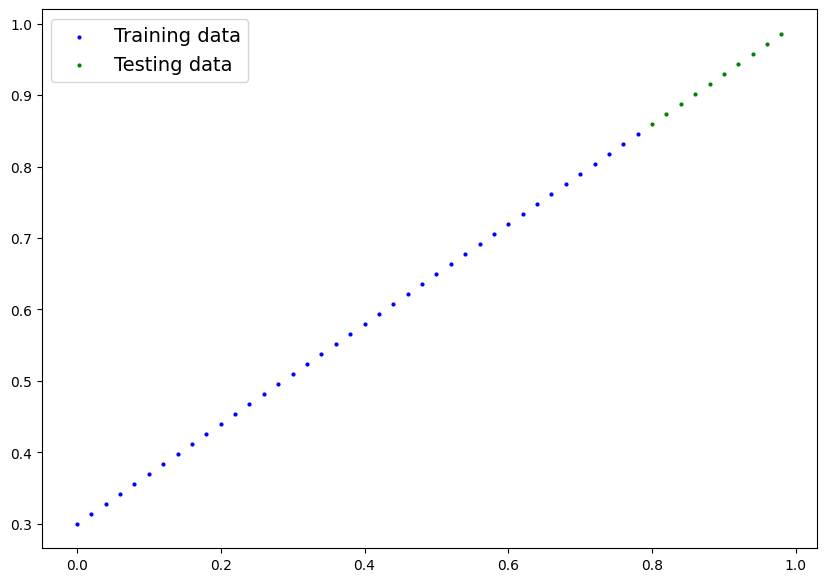

In [9]:
plot_predictions();

### First pytorch model

In [10]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) 
        # Stores gradients, takes longer to learn. 
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True, dtype=torch.float))
        # bias
        
        
    def forward(self,x:torch.Tensor)->torch.Tensor: # <--"x" is the input
        # x: torch.Tensor: This specifies that the method takes one parameter, x, 
        # which is expected to be a tensor from the PyTorch library (torch.Tensor).
        # In this context, x represents the input to the neural network.

        # -> torch.Tensor: This indicates the return type of the method. 
        # In this case, it means that the method will return a tensor (again, from the PyTorch library)
        return self.weights*x +self.bias

In [11]:
## check inside of the model

In [12]:
# create random seed
torch.manual_seed(42)

# create ad instance of the model 
model_0=LinearRegressionModel()

In [13]:
list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

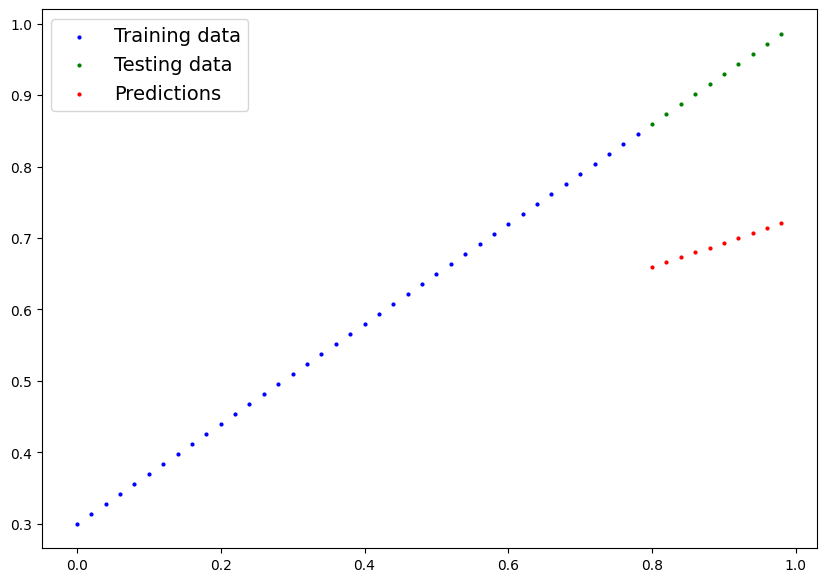

In [22]:
#### making prediction using 'torch.inference_mode() does not keep track of gradient-> much faster'
with torch.inference_mode():
    y_preds=model_0(X_test)

y_preds

plot_predictions(predictions=y_preds)

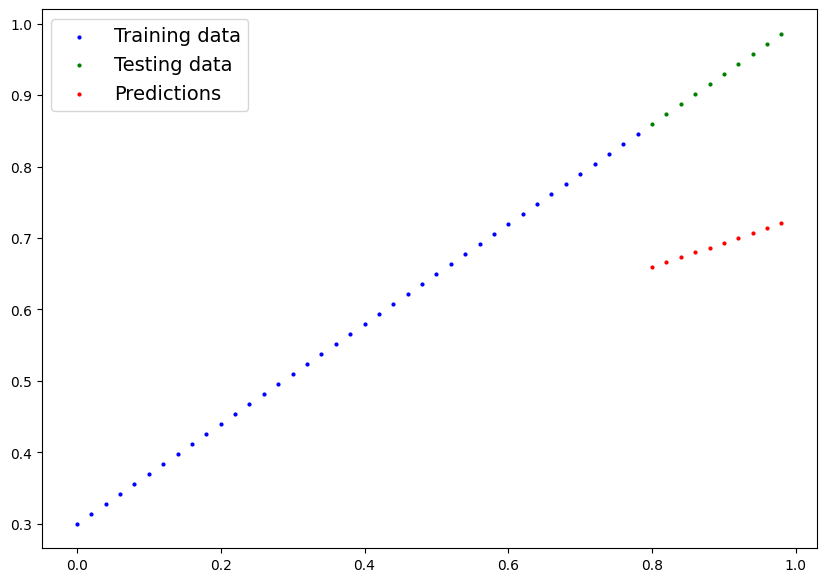

In [21]:
with torch.inference_mode():
    y_preds=model_0(X_test)

y_preds

plot_predictions(predictions=y_preds);

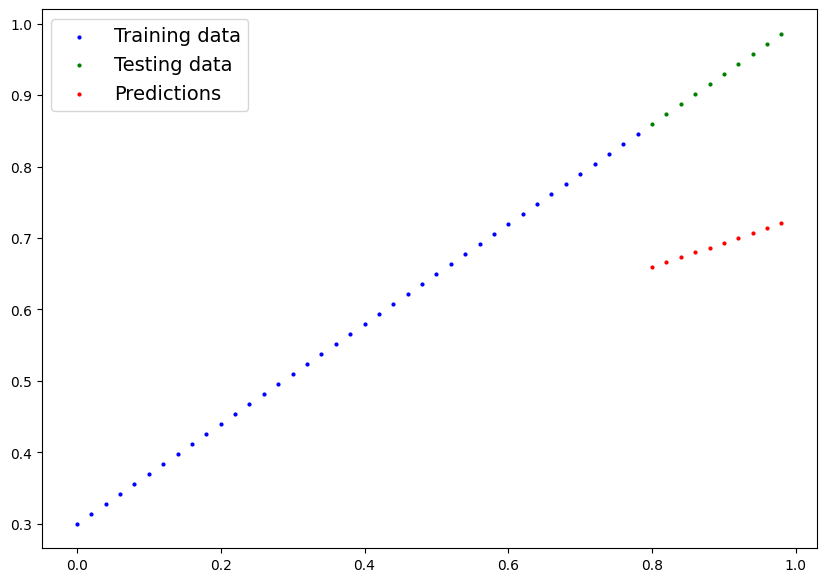

In [15]:
plot_predictions(predictions=y_preds);

In [16]:
loss_fn=nn.L1Loss()
    
    
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)# learning rate improtant hyperparameter    


In [17]:
# An epoch is one loop through the data... (this is a hyperparameter because we have set it)

epochs=200
epoch_count=[]
train_loss_values=[]
test_loss_values=[]
# 0 loop through the data
for epoch in range(epochs):
    
    # set the model to trining mode
    
    model_0.train() # train mode in pytorch
    
    
    # 1. Forward pass
    y_pred=model_0(X_train)
    # 2. Calculate the loss
    loss=loss_fn(y_pred,y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    
    optimizer.step()
    
    
    
    model_0.eval() # turn off gradient tracking
    
    

    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test)

        # 2. Caculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

        # Print out what's happening
        if epoch % 10 == 0:
#             print(f"loss {loss}")
            print(f"parameters values \n {model_0.state_dict()}")
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


parameters values 
 OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])
Epoch: 0 | MAE Train Loss: 0.08169572055339813 | MAE Test Loss: 0.22662055492401123 
parameters values 
 OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])
Epoch: 10 | MAE Train Loss: 0.06808149069547653 | MAE Test Loss: 0.1807345449924469 
parameters values 
 OrderedDict([('weights', tensor([0.3891])), ('bias', tensor([0.4204]))])
Epoch: 20 | MAE Train Loss: 0.06258393079042435 | MAE Test Loss: 0.15627031028270721 
parameters values 
 OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.4179]))])
Epoch: 30 | MAE Train Loss: 0.05879194289445877 | MAE Test Loss: 0.1418602615594864 
parameters values 
 OrderedDict([('weights', tensor([0.4261])), ('bias', tensor([0.4129]))])
Epoch: 40 | MAE Train Loss: 0.05530194193124771 | MAE Test Loss: 0.13084018230438232 
parameters values 
 OrderedDict([('weights', tensor([0.4439])), ('bias', tensor([0.4074]))])
Epoch: 50 | MAE

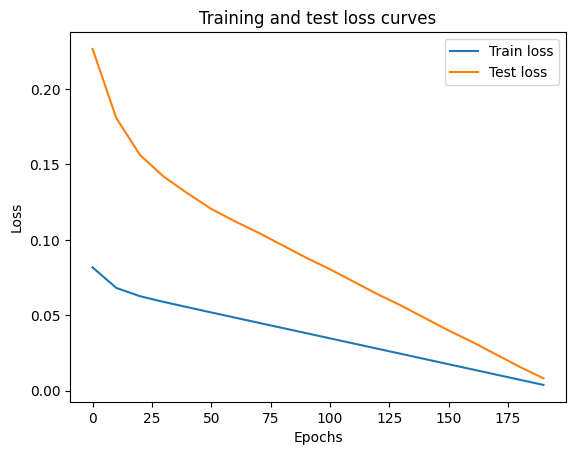

In [18]:
#######m plot the loss curve



# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();




In [19]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [20]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [23]:
#### saving a model in pytorch

In [26]:
from pathlib import Path

# 1 create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2 Create model save path
MODEL_NAME= "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME


# Save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH)







saving model to: models\01_pytorch_workflow_model_0.pth


In [27]:
#### load the model

In [28]:
### loading torch model

In [29]:
### to load saved state_dict

In [30]:
loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0

In [31]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.1288])), ('bias', tensor([0.6009]))])

In [33]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [34]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [35]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model_0(X_test)
loaded_model_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

In [36]:
# compare loaded model preds with original model preds

y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Recap: Putting it all together

In [42]:
###### re do everything

import torch
from torch import nn
from matplotlib import pyplot as plt

torch.__version__

# device agnostic
device= 'cuda' if torch.cuda.is_available() else "cpu"
print(f"Using device {device}")

Using device cpu


#### 1. Data creation step

In [43]:
# Create some data using the linear regression formula of y= weight*X + bias

weight=0.7
bias =0.3


# create range values

start=0
end=1
step=0.02

# Create X and y (feature and labels)

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+ bias

X[:10], y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [46]:
# split the data
train_split=int(0.8 * len(X))
X_train, y_train=X[:train_split],y[:train_split]
X_test, y_test= X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [48]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

        # Show the legend
        plt.legend(prop={"size": 14});


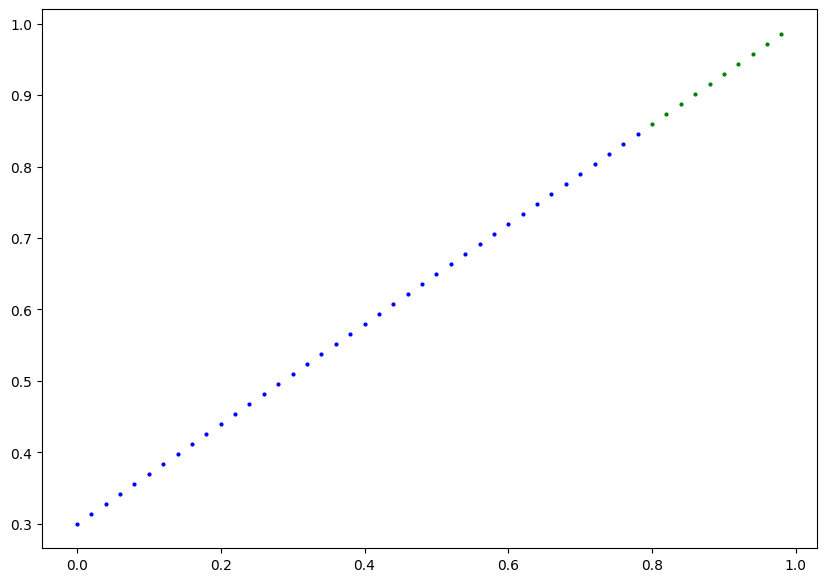

In [49]:
plot_predictions()

#### 2 Bulilding a PyTorch Linear Model

In [52]:
# create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer=nn.Linear(in_features=1,
                                    out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

    
# set the manual seed
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

#### 3 Training the model 
For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [53]:
# check parameter of the current device
next(model_1.parameters()).device

device(type='cpu')

In [56]:
# set the model to use the target device
# model_1.to(device)
# next(model_1.paramters()).device

In [59]:
# setup loss function
loss_fn=nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)


In [63]:
# let's write a training loop
torch.manual_seed(42)



epochs=200

for epoch in range(epochs):
    model_1.train()
    
    # 1. Forward pass
    y_pred=model_1(X_train)
    
    # 2. Calculate the loss
    loss=loss_fn(y_pred,y_train)
    
    # 3. optimizer zero grad
    optimizer.zero_grad() # reduce the grad back to 0 so that we start fresh after epoch?
    
    # 4. perform backpropagation
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step() # which way should i optimize the parameters ie adjust bias or weight to reduce the loss
    
    ### Testing
    
    model_1.eval()
    with torch.inference_mode():
        test_pred=model_1(X_test)
        test_loss=loss_fn(test_pred, y_test)
    
    # printing what is happening 
    
    
    if epoch %10==0:
        print(f"Epoch: {epoch} | Loss: {loss} | test_loss: {test_loss}")
        


Epoch: 0 | Loss: 0.5551779866218567 | test_loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | test_loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | test_loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | test_loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | test_loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | test_loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | test_loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | test_loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | test_loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | test_loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | test_loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | test_loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | test_loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | test_loss: 0.01380180753767

In [64]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [65]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [66]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

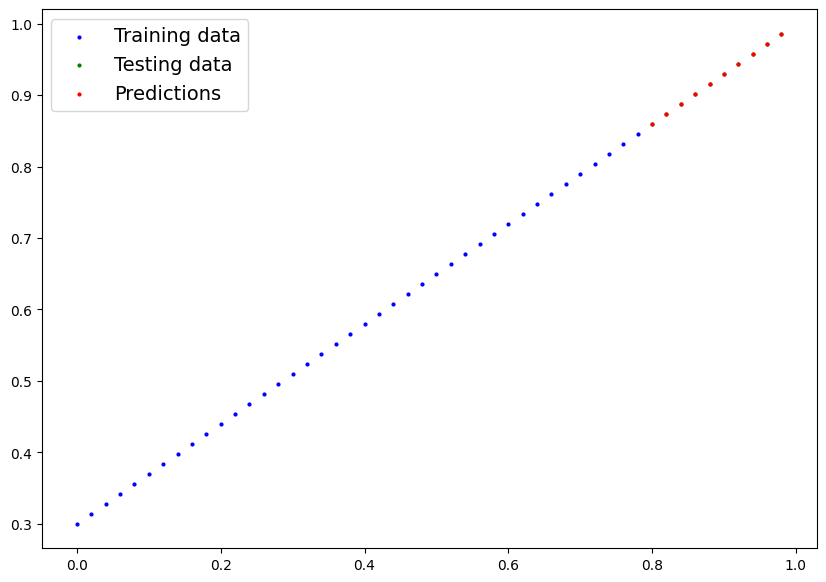

In [67]:

# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())